# Problem Statement


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

# Objective

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The steps that we follow are:
1. Data understanding and exploration
2. Data cleaning
3. Data Preparation
4. Model Building and evaluation


### Step 1: Data understanding and exploration

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import scipy.stats as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#Storing the data in the dataframe
telecom_churn_data = pd.read_csv(r'F:\Upgrad PGC Notes\Course 4\Machine Learning 2\Telecom Churn - Group Case study\telecom_churn_data.csv')

In [3]:
# set_option for output display
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [4]:
#getting the shape of the dataframe
telecom_churn_data.shape

(99999, 226)

In [5]:
#getting the head of the dataframe
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
#getting the basic information of the data
telecom_churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [7]:
#getting the description of the data
telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
#Checking the datatypes of the dataframe
telecom_churn_data.info(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [9]:
#checking for null value percentage
round((telecom_churn_data.isnull().sum()/telecom_churn_data.isnull().count()).sort_values(ascending=False),2)*100

count_rech_2g_6             75.0
date_of_last_rech_data_6    75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
max_rech_data_6             75.0
total_rech_data_6           75.0
arpu_3g_6                   75.0
arpu_2g_6                   75.0
night_pck_user_6            75.0
fb_user_6                   75.0
arpu_3g_7                   74.0
count_rech_2g_7             74.0
fb_user_7                   74.0
count_rech_3g_7             74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
max_rech_data_7             74.0
night_pck_user_7            74.0
total_rech_data_7           74.0
date_of_last_rech_data_7    74.0
night_pck_user_9            74.0
date_of_last_rech_data_9    74.0
fb_user_9                   74.0
arpu_2g_9                   74.0
max_rech_data_9             74.0
arpu_3g_9                   74.0
total_rech_data_9           74.0
av_rech_amt_data_9          74.0
count_rech_3g_9             74.0
count_rech_2g_9             74.0
fb_user_8 

### Step 2: Data Cleaning

In [10]:
# create a list of recharge columns where we will impute missing values with zeroes
impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [11]:
# impute missing values with 0
telecom_churn_data[impute_zero] = telecom_churn_data[impute_zero].apply(lambda x: x.fillna(0))

In [12]:
#checking the rows and columns
telecom_churn_data.shape

(99999, 226)

In [13]:
# Also there are date columns which have nearly 32 unique values- as date is a categorical column ,
# with 32 unique values we cannot make any inferences or 1 unique value which does not show any variance in data
# So we can drop date columns
telecom_churn_data.drop(['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9', 
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9'], axis=1,inplace=True)

In [14]:
#checking for null value percentage
round((telecom_churn_data.isnull().sum()/telecom_churn_data.isnull().count()).sort_values(ascending=False),2)*100

count_rech_2g_6       75.0
fb_user_6             75.0
arpu_2g_6             75.0
arpu_3g_6             75.0
count_rech_3g_6       75.0
night_pck_user_6      75.0
fb_user_7             74.0
count_rech_3g_7       74.0
night_pck_user_7      74.0
count_rech_2g_7       74.0
arpu_3g_7             74.0
arpu_2g_7             74.0
fb_user_9             74.0
night_pck_user_9      74.0
count_rech_2g_9       74.0
arpu_3g_9             74.0
count_rech_3g_9       74.0
arpu_2g_9             74.0
night_pck_user_8      74.0
arpu_3g_8             74.0
arpu_2g_8             74.0
fb_user_8             74.0
count_rech_3g_8       74.0
count_rech_2g_8       74.0
loc_ic_mou_9           8.0
std_og_t2c_mou_9       8.0
std_ic_mou_9           8.0
spl_ic_mou_9           8.0
loc_ic_t2m_mou_9       8.0
isd_ic_mou_9           8.0
std_og_t2f_mou_9       8.0
ic_others_9            8.0
std_og_t2m_mou_9       8.0
std_og_t2t_mou_9       8.0
loc_og_t2m_mou_9       8.0
loc_ic_t2t_mou_9       8.0
loc_og_mou_9           8.0
l

In [15]:
#removing the columns with more than 70% null values
col = telecom_churn_data.columns[telecom_churn_data.isnull().sum()/len(telecom_churn_data.index)>.7] 
#Dropping the columns
telecom_churn_data = telecom_churn_data.drop(col, axis = 1)
telecom_churn_data.shape

(99999, 190)

In [16]:
#checking for null value percentage
round((telecom_churn_data.isnull().sum()/telecom_churn_data.isnull().count()).sort_values(ascending=False),2)*100

loc_og_t2m_mou_9      8.0
loc_ic_mou_9          8.0
loc_og_t2t_mou_9      8.0
std_ic_t2f_mou_9      8.0
loc_ic_t2f_mou_9      8.0
loc_og_t2f_mou_9      8.0
std_ic_t2o_mou_9      8.0
loc_og_t2c_mou_9      8.0
loc_og_mou_9          8.0
loc_ic_t2t_mou_9      8.0
roam_ic_mou_9         8.0
std_og_t2t_mou_9      8.0
std_ic_mou_9          8.0
std_og_t2m_mou_9      8.0
ic_others_9           8.0
std_og_t2f_mou_9      8.0
isd_ic_mou_9          8.0
loc_ic_t2m_mou_9      8.0
roam_og_mou_9         8.0
spl_ic_mou_9          8.0
og_others_9           8.0
isd_og_mou_9          8.0
std_og_t2c_mou_9      8.0
std_ic_t2m_mou_9      8.0
onnet_mou_9           8.0
std_ic_t2t_mou_9      8.0
offnet_mou_9          8.0
std_og_mou_9          8.0
spl_og_mou_9          8.0
roam_ic_mou_8         5.0
og_others_8           5.0
std_og_t2t_mou_8      5.0
std_ic_mou_8          5.0
std_og_t2c_mou_8      5.0
std_og_t2m_mou_8      5.0
spl_og_mou_8          5.0
std_og_t2f_mou_8      5.0
std_ic_t2t_mou_8      5.0
ic_others_8 

In [17]:
# Basic Exploratory analysis
# Number of unique values in each column
def get_uniquecount(x):
    return len(telecom_churn_data[x].unique())

total_unique_val={count: get_uniquecount(count) for count in telecom_churn_data.columns}
total_unique_val

{'mobile_number': 99999,
 'circle_id': 1,
 'loc_og_t2o_mou': 2,
 'std_og_t2o_mou': 2,
 'loc_ic_t2o_mou': 2,
 'arpu_6': 85681,
 'arpu_7': 85308,
 'arpu_8': 83615,
 'arpu_9': 79937,
 'onnet_mou_6': 24314,
 'onnet_mou_7': 24337,
 'onnet_mou_8': 24090,
 'onnet_mou_9': 23566,
 'offnet_mou_6': 31141,
 'offnet_mou_7': 31024,
 'offnet_mou_8': 30909,
 'offnet_mou_9': 30078,
 'roam_ic_mou_6': 6513,
 'roam_ic_mou_7': 5231,
 'roam_ic_mou_8': 5316,
 'roam_ic_mou_9': 4828,
 'roam_og_mou_6': 8039,
 'roam_og_mou_7': 6640,
 'roam_og_mou_8': 6505,
 'roam_og_mou_9': 5883,
 'loc_og_t2t_mou_6': 13540,
 'loc_og_t2t_mou_7': 13412,
 'loc_og_t2t_mou_8': 13337,
 'loc_og_t2t_mou_9': 12950,
 'loc_og_t2m_mou_6': 20906,
 'loc_og_t2m_mou_7': 20638,
 'loc_og_t2m_mou_8': 20545,
 'loc_og_t2m_mou_9': 20142,
 'loc_og_t2f_mou_6': 3861,
 'loc_og_t2f_mou_7': 3864,
 'loc_og_t2f_mou_8': 3808,
 'loc_og_t2f_mou_9': 3759,
 'loc_og_t2c_mou_6': 2236,
 'loc_og_t2c_mou_7': 2427,
 'loc_og_t2c_mou_8': 2517,
 'loc_og_t2c_mou_9': 2333,


In [18]:
# Let us remove the columns that have only one unique value as it doesnt show any variance in the data
print("Dropping Columns with only 1 unique value")
for col in telecom_churn_data.columns:
    if get_uniquecount(col) ==1:
        print(col)
        telecom_churn_data.drop(telecom_churn_data[{col}],axis=1,inplace=True)

Dropping Columns with only 1 unique value
circle_id


In [19]:
#dropping mobile number
telecom_churn_data.drop('mobile_number',axis=1,inplace=True)

In [20]:
#checking the rows and columns
telecom_churn_data.shape

(99999, 188)

In [21]:
#checking for null value percentage
missing=round((telecom_churn_data.isnull().sum()/telecom_churn_data.isnull().count()).sort_values(ascending=False),2)*100
missing

spl_og_mou_9          8.0
roam_og_mou_9         8.0
std_ic_t2f_mou_9      8.0
std_og_t2m_mou_9      8.0
std_ic_t2o_mou_9      8.0
loc_og_t2m_mou_9      8.0
std_ic_mou_9          8.0
std_og_mou_9          8.0
loc_og_t2f_mou_9      8.0
spl_ic_mou_9          8.0
loc_og_t2c_mou_9      8.0
isd_ic_mou_9          8.0
loc_og_mou_9          8.0
ic_others_9           8.0
std_og_t2c_mou_9      8.0
std_og_t2t_mou_9      8.0
std_og_t2f_mou_9      8.0
std_ic_t2m_mou_9      8.0
loc_og_t2t_mou_9      8.0
loc_ic_t2f_mou_9      8.0
isd_og_mou_9          8.0
std_ic_t2t_mou_9      8.0
loc_ic_t2m_mou_9      8.0
offnet_mou_9          8.0
onnet_mou_9           8.0
loc_ic_t2t_mou_9      8.0
loc_ic_mou_9          8.0
roam_ic_mou_9         8.0
og_others_9           8.0
std_og_t2c_mou_8      5.0
isd_og_mou_8          5.0
loc_ic_t2t_mou_8      5.0
og_others_8           5.0
ic_others_8           5.0
spl_og_mou_8          5.0
std_ic_t2m_mou_8      5.0
spl_ic_mou_8          5.0
isd_ic_mou_8          5.0
loc_ic_t2m_m

In [22]:
# storing the null value columns and the percentage in dataframe
missing_data=pd.DataFrame({'missing_col':missing.index, 'percentage':missing.values})
missing_data

,missing_col,percentage
0,spl_og_mou_9,8.0
1,roam_og_mou_9,8.0
2,std_ic_t2f_mou_9,8.0
3,std_og_t2m_mou_9,8.0
4,std_ic_t2o_mou_9,8.0
5,loc_og_t2m_mou_9,8.0
6,std_ic_mou_9,8.0
7,std_og_mou_9,8.0
8,loc_og_t2f_mou_9,8.0
9,spl_ic_mou_9,8.0


In [23]:
#filtering for the missing data columns
missing_data = missing_data.loc[missing_data['percentage'] >0]
missing_data_cols=list(missing_data['missing_col'])
missing_data_cols

['spl_og_mou_9',
 'roam_og_mou_9',
 'std_ic_t2f_mou_9',
 'std_og_t2m_mou_9',
 'std_ic_t2o_mou_9',
 'loc_og_t2m_mou_9',
 'std_ic_mou_9',
 'std_og_mou_9',
 'loc_og_t2f_mou_9',
 'spl_ic_mou_9',
 'loc_og_t2c_mou_9',
 'isd_ic_mou_9',
 'loc_og_mou_9',
 'ic_others_9',
 'std_og_t2c_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2f_mou_9',
 'std_ic_t2m_mou_9',
 'loc_og_t2t_mou_9',
 'loc_ic_t2f_mou_9',
 'isd_og_mou_9',
 'std_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'offnet_mou_9',
 'onnet_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_mou_9',
 'roam_ic_mou_9',
 'og_others_9',
 'std_og_t2c_mou_8',
 'isd_og_mou_8',
 'loc_ic_t2t_mou_8',
 'og_others_8',
 'ic_others_8',
 'spl_og_mou_8',
 'std_ic_t2m_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'loc_ic_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2f_mou_8',
 'onnet_mou_8',
 'loc_og_t2

In [24]:
# checking the summary of mean,min,max values
num_visit=telecom_churn_data[missing_data_cols]
num_visit.describe()

,spl_og_mou_9,roam_og_mou_9,std_ic_t2f_mou_9,std_og_t2m_mou_9,std_ic_t2o_mou_9,loc_og_t2m_mou_9,std_ic_mou_9,std_og_mou_9,loc_og_t2f_mou_9,spl_ic_mou_9,loc_og_t2c_mou_9,isd_ic_mou_9,loc_og_mou_9,ic_others_9,std_og_t2c_mou_9,std_og_t2t_mou_9,std_og_t2f_mou_9,std_ic_t2m_mou_9,loc_og_t2t_mou_9,loc_ic_t2f_mou_9,isd_og_mou_9,std_ic_t2t_mou_9,loc_ic_t2m_mou_9,offnet_mou_9,onnet_mou_9,loc_ic_t2t_mou_9,loc_ic_mou_9,roam_ic_mou_9,og_others_9,std_og_t2c_mou_8,isd_og_mou_8,loc_ic_t2t_mou_8,og_others_8,ic_others_8,spl_og_mou_8,std_ic_t2m_mou_8,spl_ic_mou_8,isd_ic_mou_8,loc_ic_t2m_mou_8,std_og_mou_8,loc_ic_t2f_mou_8,std_ic_mou_8,std_ic_t2o_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_og_t2f_mou_8,loc_ic_mou_8,std_og_t2m_mou_8,loc_og_t2c_mou_8,roam_ic_mou_8,loc_og_t2f_mou_8,onnet_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_8,roam_og_mou_8,loc_og_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_ic_t2m_mou_6,std_ic_mou_6,loc_og_t2m_mou_6,std_ic_t2o_mou_6,std_ic_t2f_mou_6,std_og_t2f_mou_6,isd_og_mou_6,loc_og_t2t_mou_6,loc_ic_t2f_mou_6,std_ic_t2m_mou_6,roam_og_mou_6,roam_ic_mou_6,std_ic_t2t_mou_6,loc_og_t2f_mou_6,offnet_mou_6,loc_ic_mou_6,ic_others_6,og_others_6,std_og_t2m_mou_6,std_og_t2c_mou_6,spl_og_mou_6,std_og_mou_6,std_og_t2t_mou_6,spl_ic_mou_6,onnet_mou_6,loc_og_mou_6,isd_ic_mou_6,loc_ic_t2t_mou_6,loc_og_t2c_mou_6,onnet_mou_7,offnet_mou_7,spl_og_mou_7,loc_ic_t2f_mou_7,loc_ic_t2m_mou_7,og_others_7,loc_ic_t2t_mou_7,roam_ic_mou_7,loc_og_t2t_mou_7,loc_ic_mou_7,std_og_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,std_og_t2c_mou_7,std_og_t2t_mou_7,loc_og_mou_7,isd_ic_mou_7,loc_og_t2c_mou_7,isd_og_mou_7,spl_ic_mou_7,loc_og_t2f_mou_7,std_ic_mou_7,loc_og_t2m_mou_7,std_ic_t2o_mou_7,std_ic_t2f_mou_7,std_ic_t2m_mou_7,roam_og_mou_7,std_ic_t2t_mou_7,ic_others_7,loc_ic_t2o_mou,std_og_t2o_mou,loc_og_t2o_mou
count,92254.000000,92254.000000,92254.000000,92254.000000,92254.0,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.0,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,94621.0,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.0,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,96062.000000,96062.000000,96062.000000,96062.0,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.0,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.0,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.0,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,98981.0,98981.0,98981.0
mean,4.412767,8.555519,2.173419,86.276622,0.0,90.463192,31.229344,169.664466,3.655123,0.163137,1.232726,8.063003,138.709970,1.017162,0.0,82.342919,1.042362,19.620913,44.584446,12.173105,0.723892,9.432479,106.155471,190.337222,130.302327,46.281794,164.619293,6.343841,0.047456,0.0,0.791247,47.211362,0.033372,0.970800,5.053769,21.183211,0.040361,8.442001,108.460515,174.191498,11.751834,33.154735,0.0,9.883921,2.085004,1.067792,167.432575,89.838390,1.433821,7.292981,3.677991,133.018098,91.755128,83.282673,9.971890,141.328209,196.574803,45.887806,107.475650,32.457179,93.342088,0.0,2.156397,1.129011,0.798277,47.100763,12.084305,20.722240,13.911337,9.950013,9.575993,3.751013,197.935577,167.491059,0.854656,0.454

In [25]:
# As we can see above that most of the columns have outliers so imputing the null values with median
telecom_churn_data=telecom_churn_data.fillna(telecom_churn_data[missing_data_cols].median())

In [26]:
#checking for null value percentage
round((telecom_churn_data.isnull().sum()/telecom_churn_data.isnull().count()).sort_values(ascending=False),2)*100

sep_vbc_3g            0.0
std_og_t2c_mou_9      0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_8      0.0
spl_og_mou_8          0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
spl_og_mou_7          0.0
spl_og_mou_9          0.0
jun_vbc_3g            0.0
loc_ic_t2t_mou_9      0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_9      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2t_mou_8      0.0
og_others_6           0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_m

### Step 3: Data Preparation

### Filter High-value customers

In [27]:
avg_rech = ((telecom_churn_data.total_rech_amt_6+(telecom_churn_data.total_rech_data_6*telecom_churn_data.av_rech_amt_data_6)) +(telecom_churn_data.total_rech_amt_7+(telecom_churn_data.total_rech_data_7*telecom_churn_data.av_rech_amt_data_7)))/2
#storing the data regarding the high valued customers 
high_value_cust = telecom_churn_data.loc[avg_rech > avg_rech.quantile(0.7)]
#checking the high valued customers dataset
high_value_cust.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 188 columns):
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8    

In [28]:
#checking the 0.7 quantile value
avg_rech.quantile(0.7)

478.0

In [29]:
#Creating a derived column called Churn
high_value_cust['churn'] = high_value_cust['total_ic_mou_9'] + high_value_cust['total_og_mou_9'] + high_value_cust['vol_2g_mb_9'] + high_value_cust['vol_3g_mb_9']

In [30]:
# putting churn value = 1 if the value is more than 0
high_value_cust['churn'] = high_value_cust['churn'].apply(lambda x: 0 if x>0 else 1)

In [31]:
#checking the churn counts
high_value_cust['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

#### Tagging Churners

In [32]:
# creating 2 variables wrt churn value
churns = high_value_cust.loc[high_value_cust['churn'] == 1]
nonchurns = high_value_cust.loc[high_value_cust['churn'] == 0]

# creating a method for plotting the graphs 
def plotFig(feature, high_value_cust, str):
    f, ax = plt.subplots(figsize=(15, 5))
    sns.distplot(high_value_cust[feature + '_6'], hist=False, label=feature + '_6', rug = True)
    sns.distplot(high_value_cust[feature + '_7'], hist=False, label=feature + '_7',rug = True)
    sns.distplot(high_value_cust[feature + '_8'], hist=False, label=feature + '_8',rug = True)
    sns.distplot(high_value_cust[feature + '_9'], hist=False, label=feature + '_9',rug = True)
    ax.set(xlabel=(feature + '_' + str))
    plt.legend();

#### Visualising the Data

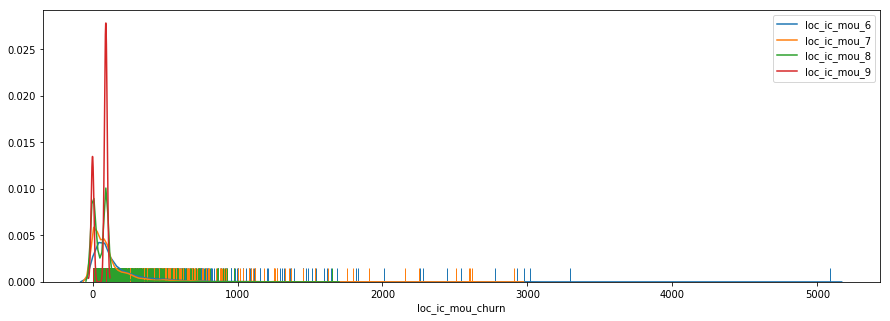

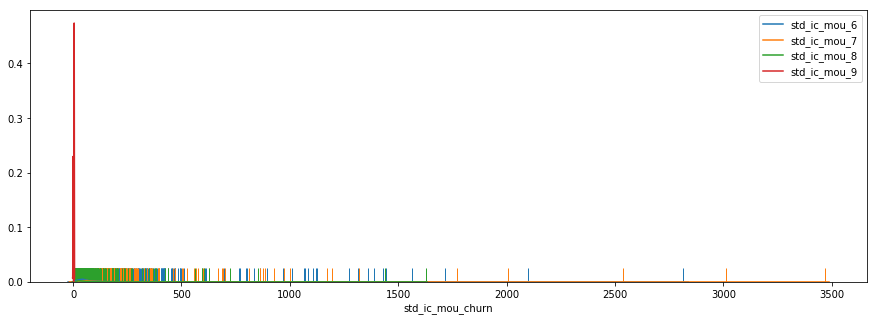

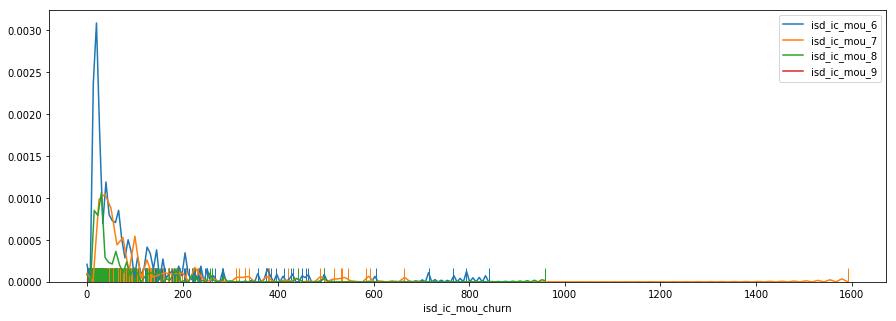

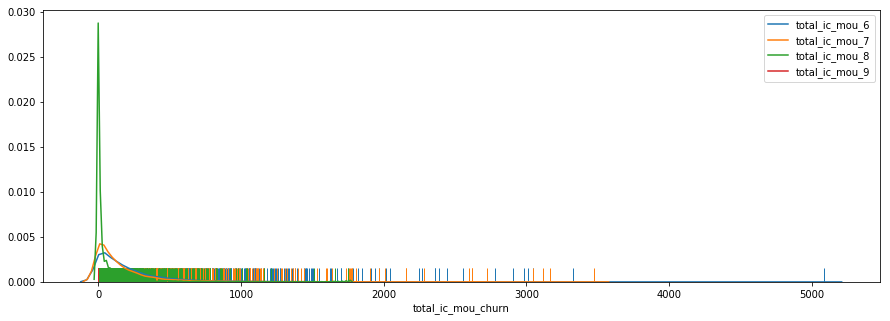

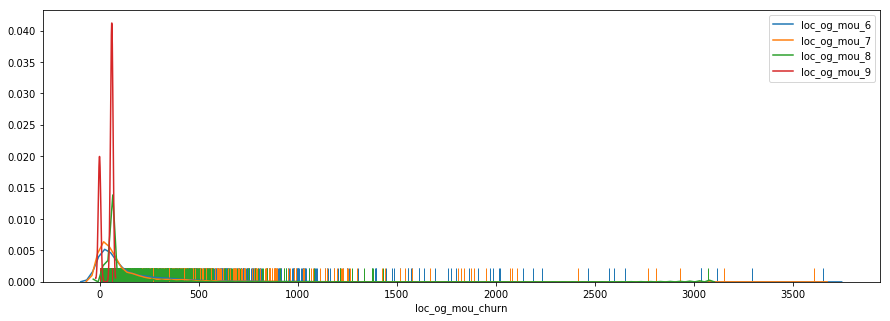

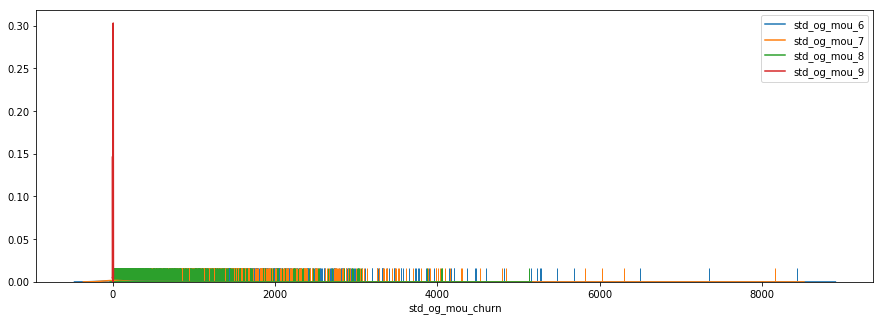

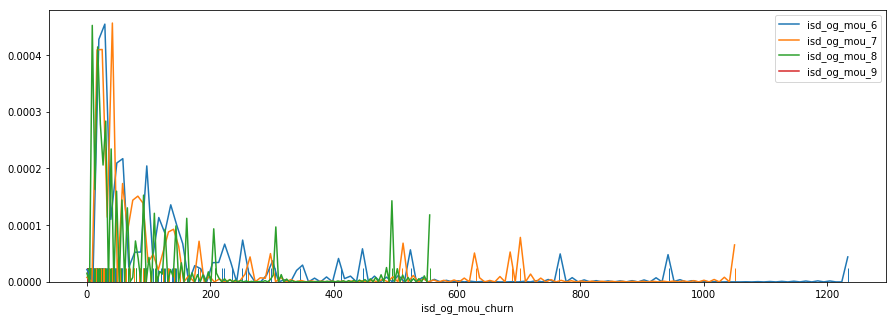

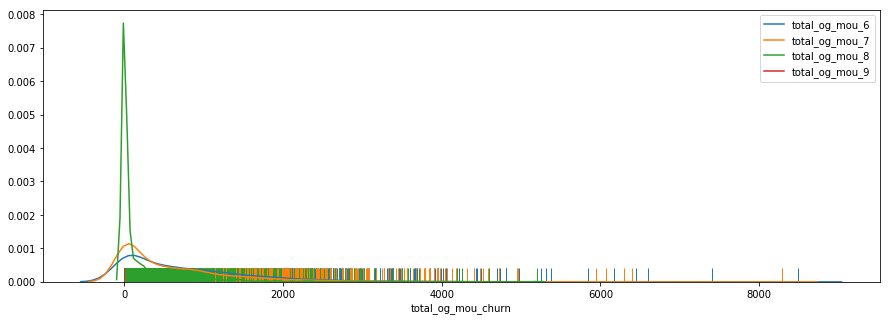

In [33]:
# ic mou plots for churns
plotFig('loc_ic_mou', churns, 'churn')
plotFig('std_ic_mou', churns, 'churn')
plotFig('isd_ic_mou', churns, 'churn')
plotFig('total_ic_mou', churns, 'churn')

# og plots mou for churns
plotFig('loc_og_mou', churns, 'churn')
plotFig('std_og_mou', churns, 'churn')
plotFig('isd_og_mou', churns, 'churn')
plotFig('total_og_mou', churns, 'churn')

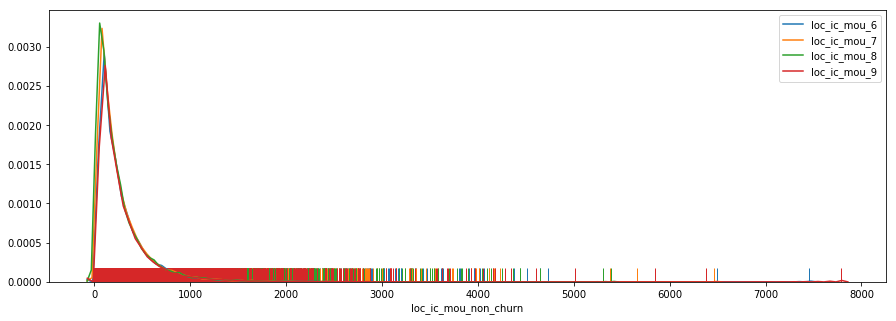

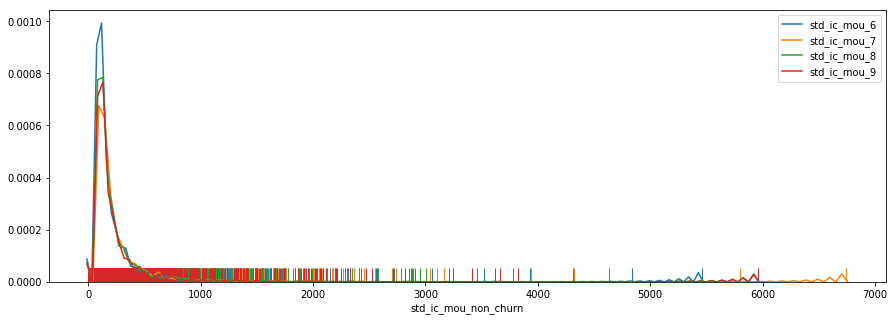

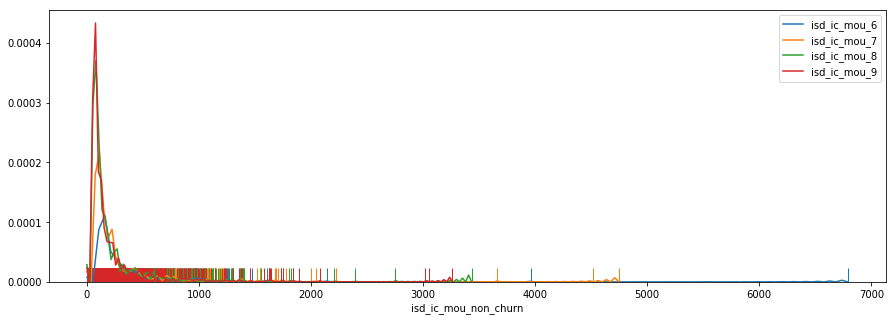

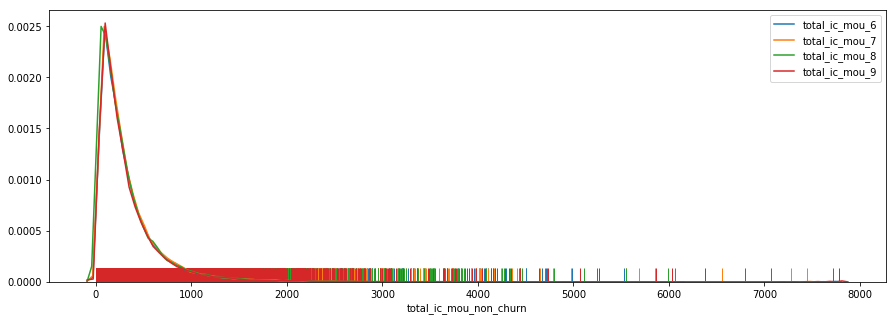

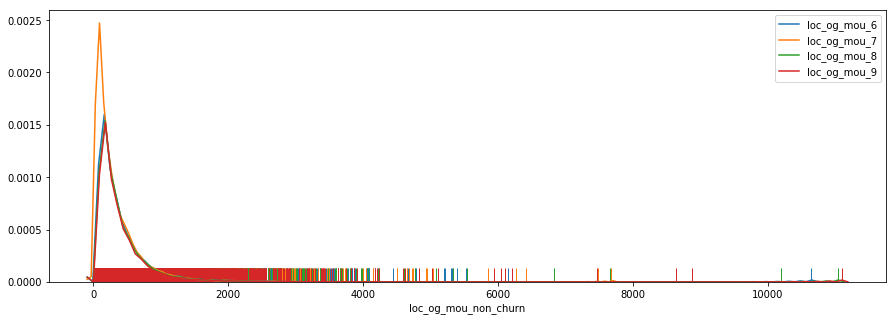

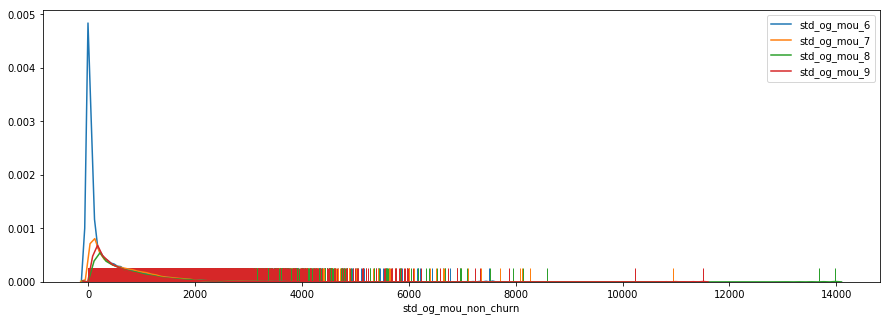

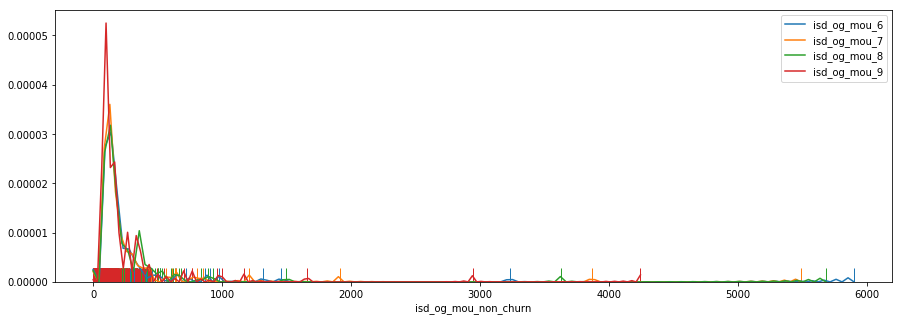

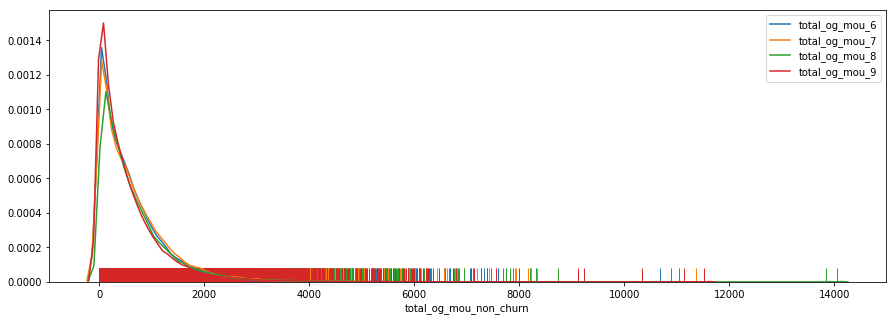

In [34]:
# ic plots for non-churns
plotFig('loc_ic_mou', nonchurns, 'non_churn')
plotFig('std_ic_mou', nonchurns, 'non_churn')
plotFig('isd_ic_mou', nonchurns, 'non_churn')
plotFig('total_ic_mou', nonchurns, 'non_churn')

# og plots for non-churns
plotFig('loc_og_mou', nonchurns, 'non_churn')
plotFig('std_og_mou', nonchurns, 'non_churn')
plotFig('isd_og_mou', nonchurns, 'non_churn')
plotFig('total_og_mou', nonchurns, 'non_churn')

From the above plot we can see that for non churners the graph looks same for all the months for both incomming and outgoing

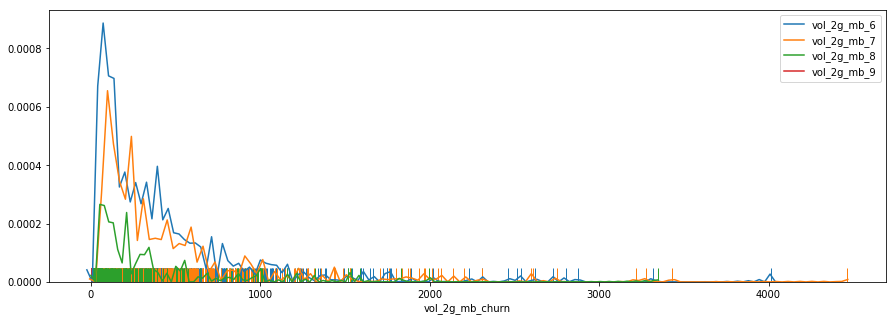

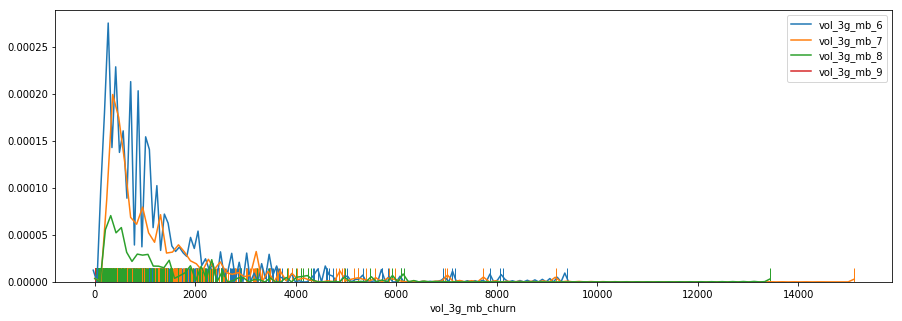

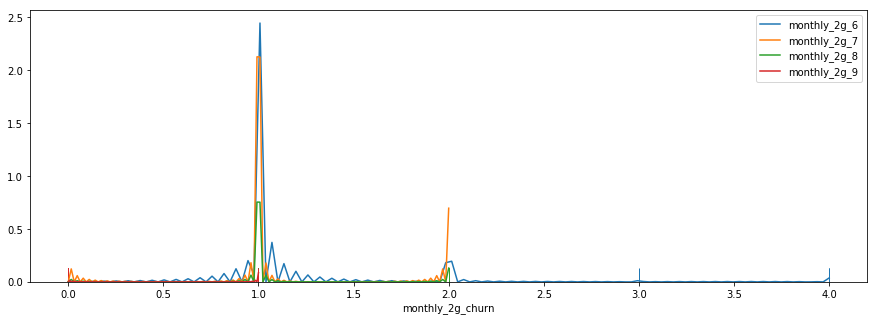

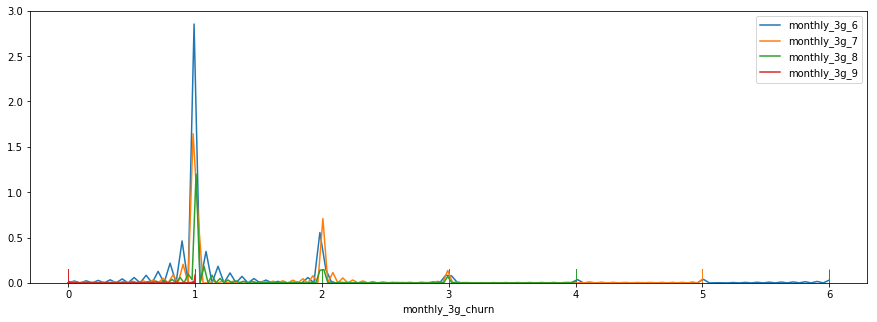

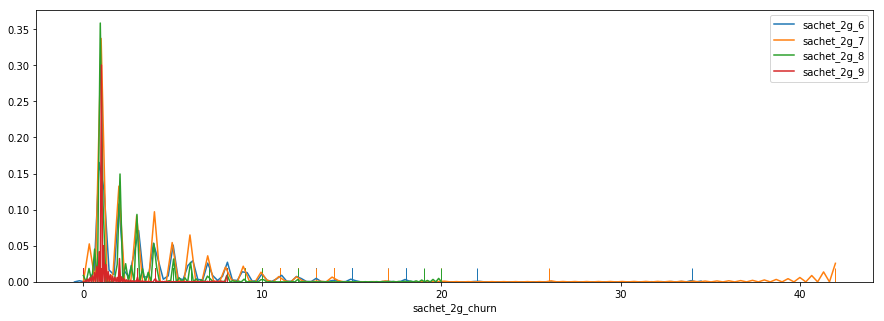

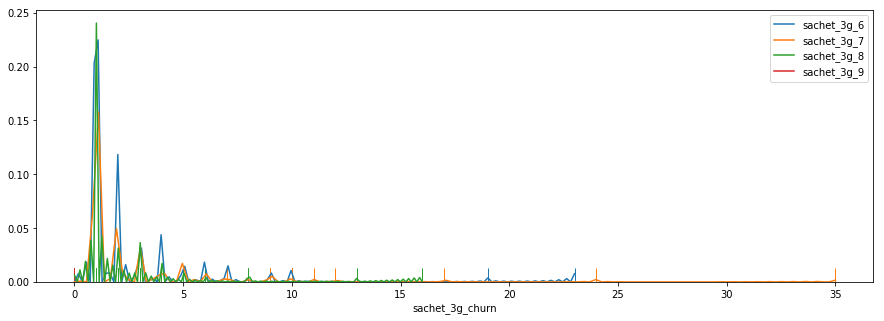

In [35]:
#plotting 
plotFig('vol_2g_mb', churns, 'churn')
plotFig('vol_3g_mb', churns, 'churn')
plotFig('monthly_2g', churns, 'churn')
plotFig('monthly_3g', churns, 'churn')
plotFig('sachet_2g', churns, 'churn')
plotFig('sachet_3g', churns, 'churn')

from the above graph we can see the amount of internet usage by the customer and money spent on the internet for Churners.

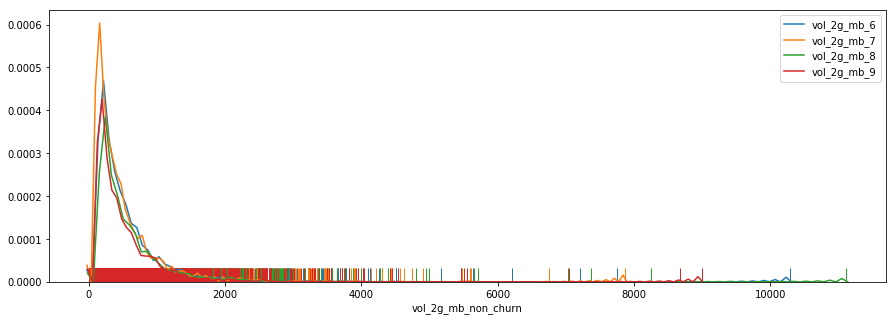

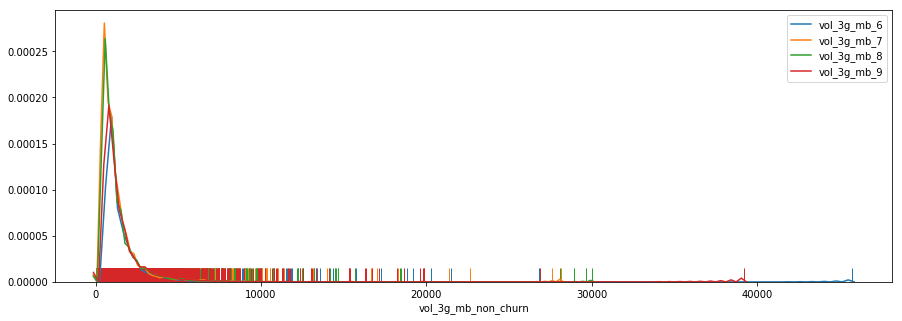

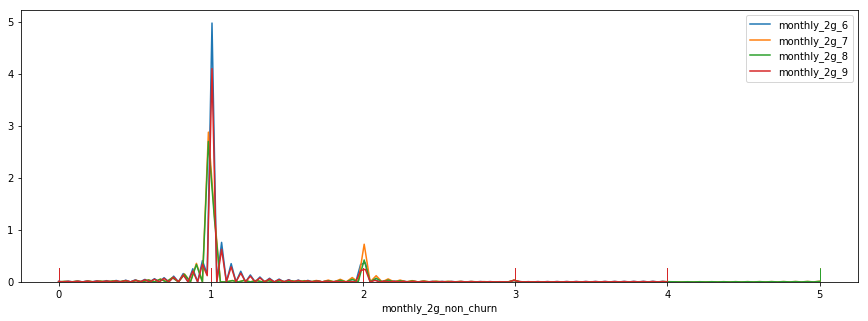

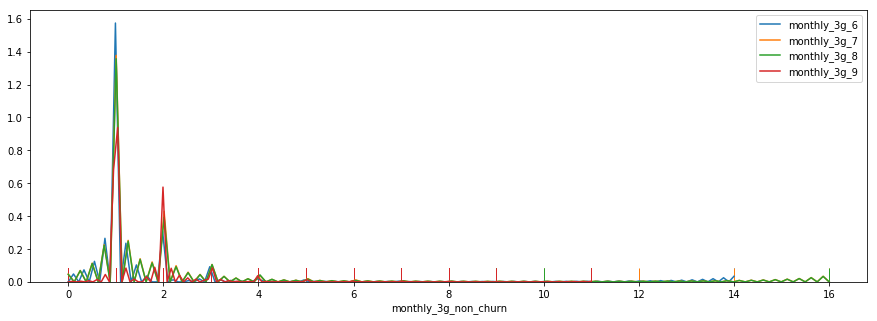

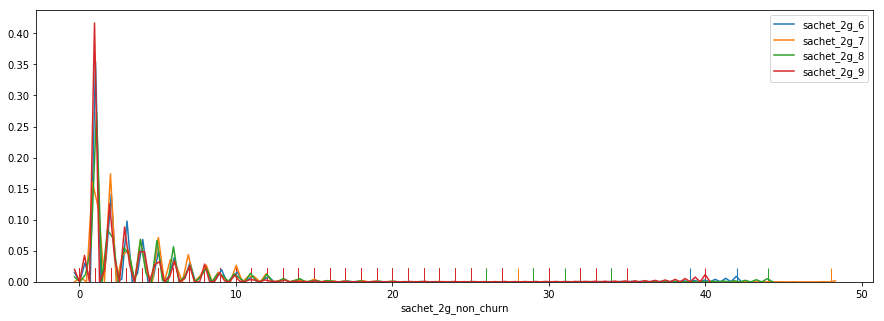

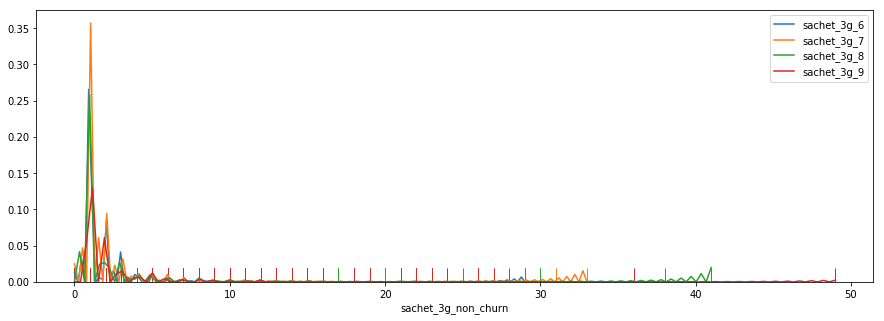

In [36]:
#plotting 
plotFig('vol_2g_mb', nonchurns, 'non_churn')
plotFig('vol_3g_mb', nonchurns, 'non_churn')
plotFig('monthly_2g', nonchurns, 'non_churn')
plotFig('monthly_3g', nonchurns, 'non_churn')
plotFig('sachet_2g', nonchurns, 'non_churn')
plotFig('sachet_3g', nonchurns, 'non_churn')

from the above graph we can see the amount of internet usage by the customer and money spent on the internet for non-churners.

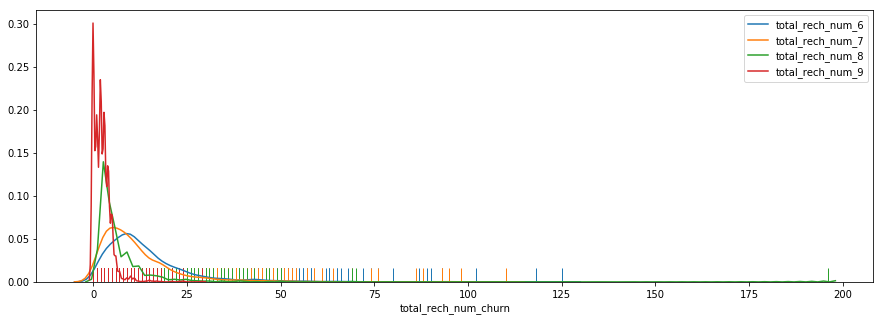

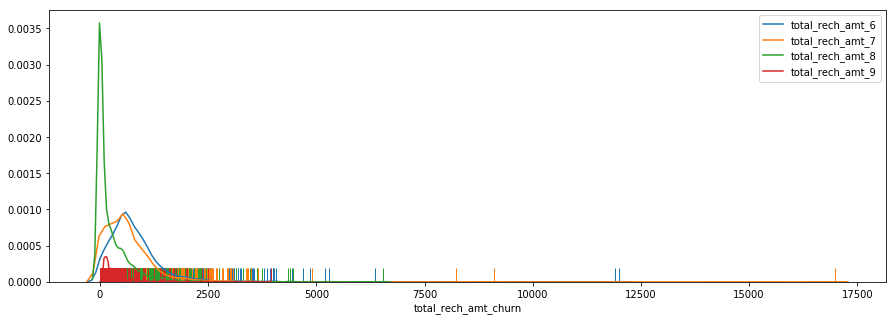

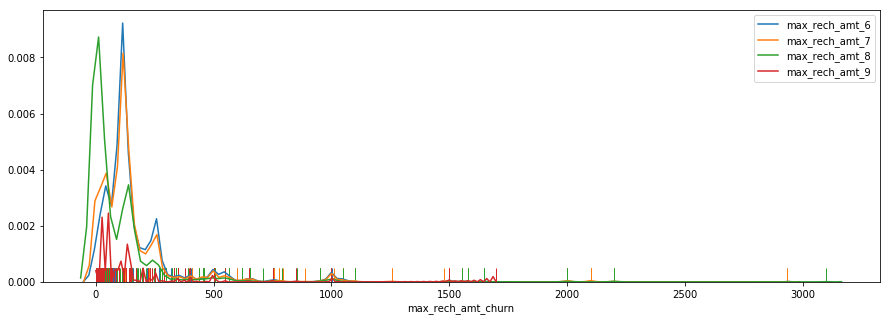

In [37]:
#plotting 
plotFig('total_rech_num', churns, 'churn')
plotFig('total_rech_amt', churns, 'churn')
plotFig('max_rech_amt', churns, 'churn')

from the above plot we can see that the recharge frequency is decreasing and the amount of recharge done is also less for Churners.

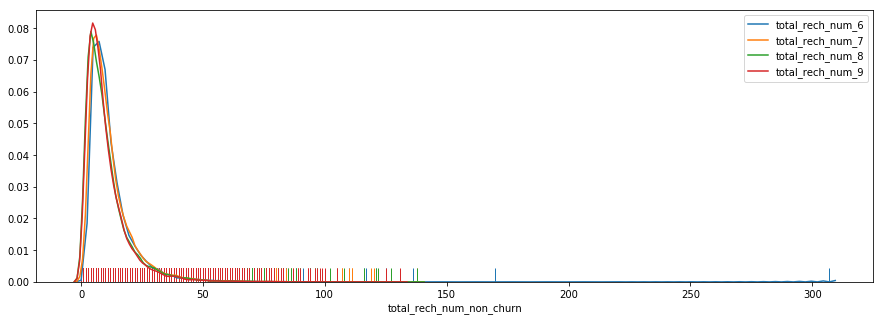

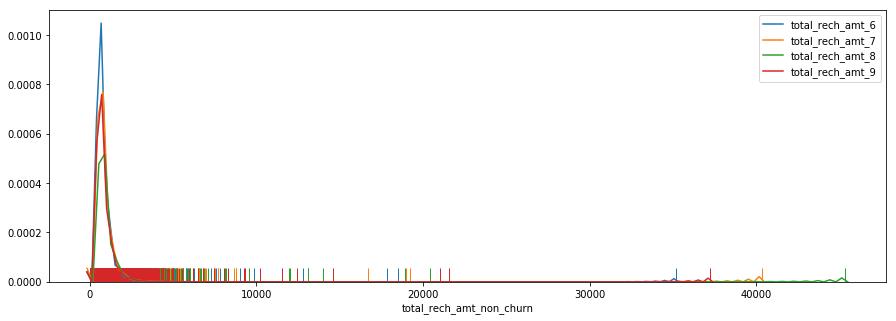

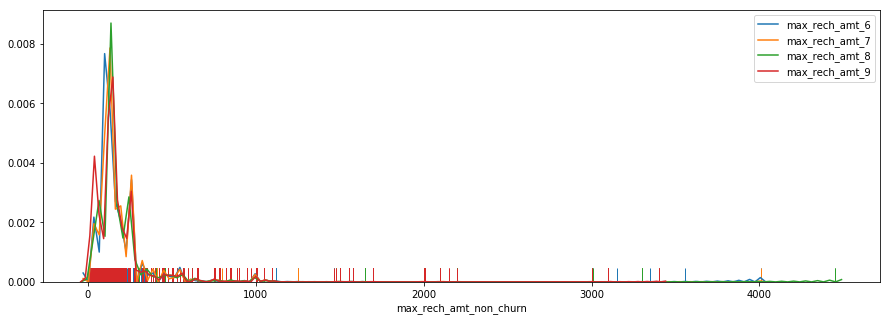

In [38]:
#plotting 
plotFig('total_rech_num', nonchurns, 'non_churn')
plotFig('total_rech_amt', nonchurns, 'non_churn')
plotFig('max_rech_amt', nonchurns, 'non_churn')

From the above graph we can see that the frequency of recharge is almost same for all the months for non-churners.

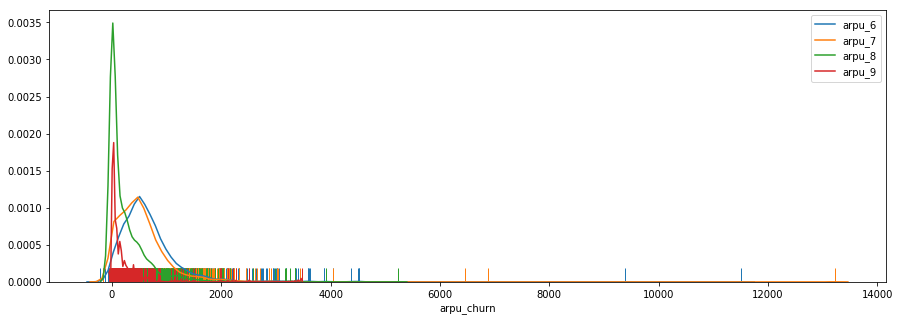

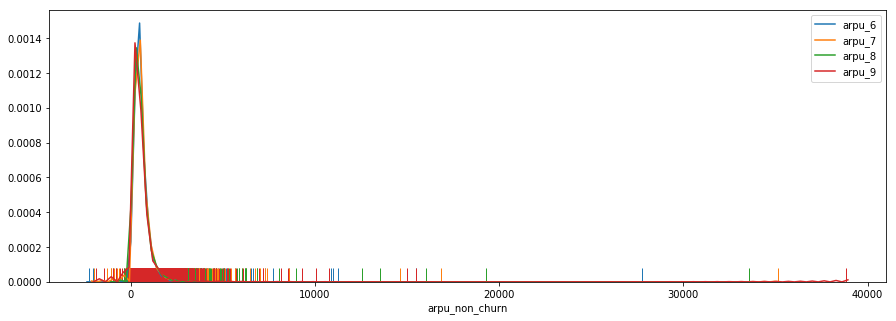

In [39]:
plotFig('arpu', churns, 'churn')
plotFig('arpu', nonchurns, 'non_churn')

from the above graph we can see that for churners the ARPU is varying wrt months, whereas for non-churners it looks same

### Feature Engineering

From the above graphs we can see that the users who are going to churn have monotonically decreasing ic/og mou and 2g/3g data volumes. To capture the decreasing trends across the first three months, we can derive new features as follows.

#### delta_f = (f_8 - mean(f_6, f_7)) / mean(f_6, f_7, f_8)

where f is a feature, such as loc_ic_mou

In [40]:
#Creating derived features
def createDerivedFeature(high_value_cust, feature):
    newFeature = 'delta_' + feature
    
    feature6 = feature + '_6'
    feature7 = feature + '_7'
    feature8 = feature + '_8'
    
    feature_avg = high_value_cust[[feature6, feature7, feature8]].mean(axis=1)
    high_value_cust[newFeature] = ((high_value_cust[feature8] - ((high_value_cust[feature6] + high_value_cust[feature7]) / 2)) / feature_avg)
                   
    high_value_cust.drop([feature6, feature7, feature8], axis=1, inplace=True)

In [41]:
# Incoming
createDerivedFeature(high_value_cust, 'loc_ic_t2t_mou')
createDerivedFeature(high_value_cust, 'loc_ic_t2m_mou')
createDerivedFeature(high_value_cust, 'loc_ic_t2f_mou')
createDerivedFeature(high_value_cust, 'loc_ic_mou')

createDerivedFeature(high_value_cust, 'std_ic_t2t_mou')
createDerivedFeature(high_value_cust, 'std_ic_t2m_mou')
createDerivedFeature(high_value_cust, 'std_ic_t2f_mou')
createDerivedFeature(high_value_cust, 'std_ic_mou')

createDerivedFeature(high_value_cust, 'spl_ic_mou')
createDerivedFeature(high_value_cust, 'isd_ic_mou')
createDerivedFeature(high_value_cust, 'ic_others')
createDerivedFeature(high_value_cust, 'roam_ic_mou')
createDerivedFeature(high_value_cust, 'std_ic_t2o_mou')

createDerivedFeature(high_value_cust, 'total_ic_mou')

# Outgoing
createDerivedFeature(high_value_cust, 'loc_og_t2t_mou')
createDerivedFeature(high_value_cust, 'loc_og_t2m_mou')
createDerivedFeature(high_value_cust, 'loc_og_t2f_mou')
createDerivedFeature(high_value_cust, 'loc_og_t2c_mou')
createDerivedFeature(high_value_cust, 'loc_og_mou')

createDerivedFeature(high_value_cust, 'std_og_t2t_mou')
createDerivedFeature(high_value_cust, 'std_og_t2m_mou')
createDerivedFeature(high_value_cust, 'std_og_t2f_mou')
createDerivedFeature(high_value_cust, 'std_og_mou')
createDerivedFeature(high_value_cust, 'std_og_t2c_mou')

createDerivedFeature(high_value_cust, 'spl_og_mou')
createDerivedFeature(high_value_cust, 'isd_og_mou')
createDerivedFeature(high_value_cust, 'og_others')
createDerivedFeature(high_value_cust, 'roam_og_mou')

createDerivedFeature(high_value_cust, 'total_og_mou')

createDerivedFeature(high_value_cust, 'onnet_mou')
createDerivedFeature(high_value_cust, 'offnet_mou')

# 2G and 3G
createDerivedFeature(high_value_cust, 'vol_2g_mb')
createDerivedFeature(high_value_cust, 'vol_3g_mb')
createDerivedFeature(high_value_cust, 'monthly_2g')
createDerivedFeature(high_value_cust, 'monthly_3g')
createDerivedFeature(high_value_cust, 'sachet_2g')
createDerivedFeature(high_value_cust, 'sachet_3g')

# Recharge and revenure
createDerivedFeature(high_value_cust, 'total_rech_num')
createDerivedFeature(high_value_cust, 'max_rech_amt')
createDerivedFeature(high_value_cust, 'total_rech_amt')
createDerivedFeature(high_value_cust, 'arpu')


createDerivedFeature(high_value_cust,'last_day_rch_amt')
createDerivedFeature(high_value_cust, 'total_rech_data')
createDerivedFeature(high_value_cust, 'max_rech_data')

createDerivedFeature(high_value_cust, 'av_rech_amt_data')

           
high_value_cust['vbc_3g_6'] = high_value_cust['jun_vbc_3g']
high_value_cust['vbc_3g_7'] = high_value_cust['jul_vbc_3g']
high_value_cust['vbc_3g_8'] = high_value_cust['aug_vbc_3g']
createDerivedFeature(high_value_cust, 'vbc_3g')
high_value_cust.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g'], axis=1, inplace=True)


After deriving all the new features, we'll fill the NA values with 0 and then we'll drop the original columns on which we'd derived new features

In [42]:
round((high_value_cust.isnull().sum()/high_value_cust.isnull().count()).sort_values(ascending=False),2)*100

delta_std_ic_t2o_mou      100.0
delta_std_og_t2c_mou      100.0
delta_isd_og_mou           86.0
delta_sachet_3g            81.0
delta_og_others            77.0
delta_monthly_3g           76.0
delta_monthly_2g           76.0
delta_std_og_t2f_mou       74.0
delta_spl_ic_mou           71.0
delta_roam_ic_mou          65.0
delta_roam_og_mou          65.0
delta_isd_ic_mou           63.0
delta_ic_others            57.0
delta_vbc_3g               57.0
delta_std_ic_t2f_mou       57.0
delta_sachet_2g            57.0
delta_vol_3g_mb            54.0
delta_loc_og_t2c_mou       51.0
delta_vol_2g_mb            38.0
delta_std_og_t2t_mou       33.0
delta_loc_og_t2f_mou       33.0
delta_max_rech_data        31.0
delta_av_rech_amt_data     31.0
delta_total_rech_data      31.0
delta_std_ic_t2t_mou       29.0
delta_spl_og_mou           22.0
delta_std_og_t2m_mou       16.0
delta_loc_ic_t2f_mou       14.0
delta_std_og_mou           12.0
delta_std_ic_t2m_mou       11.0
delta_std_ic_mou            6.0
delta_lo

In [43]:
#filling the null values with 0
high_value_cust = high_value_cust.fillna(0)

In [44]:
round((high_value_cust.isnull().sum()/high_value_cust.isnull().count()).sort_values(ascending=False),2)*100

delta_vbc_3g              0.0
sachet_3g_9               0.0
loc_ic_mou_9              0.0
std_ic_t2t_mou_9          0.0
std_ic_t2m_mou_9          0.0
std_ic_t2f_mou_9          0.0
std_ic_t2o_mou_9          0.0
std_ic_mou_9              0.0
total_ic_mou_9            0.0
spl_ic_mou_9              0.0
isd_ic_mou_9              0.0
ic_others_9               0.0
total_rech_num_9          0.0
total_rech_amt_9          0.0
max_rech_amt_9            0.0
last_day_rch_amt_9        0.0
total_rech_data_9         0.0
max_rech_data_9           0.0
av_rech_amt_data_9        0.0
vol_2g_mb_9               0.0
vol_3g_mb_9               0.0
monthly_2g_9              0.0
sachet_2g_9               0.0
loc_ic_t2f_mou_9          0.0
loc_ic_t2m_mou_9          0.0
loc_ic_t2t_mou_9          0.0
loc_og_t2f_mou_9          0.0
std_og_t2o_mou            0.0
loc_ic_t2o_mou            0.0
arpu_9                    0.0
onnet_mou_9               0.0
offnet_mou_9              0.0
roam_ic_mou_9             0.0
roam_og_mo

In [45]:
#dropping the columns with suffix _9
cols = high_value_cust.columns
cols = [i for i in cols if '_9'  in i] 
cols.append('sep_vbc_3g')
high_value_cust.drop(cols, axis=1,inplace=True)

In [46]:
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 51 columns):
loc_og_t2o_mou            29953 non-null float64
std_og_t2o_mou            29953 non-null float64
loc_ic_t2o_mou            29953 non-null float64
aon                       29953 non-null int64
churn                     29953 non-null int64
delta_loc_ic_t2t_mou      29953 non-null float64
delta_loc_ic_t2m_mou      29953 non-null float64
delta_loc_ic_t2f_mou      29953 non-null float64
delta_loc_ic_mou          29953 non-null float64
delta_std_ic_t2t_mou      29953 non-null float64
delta_std_ic_t2m_mou      29953 non-null float64
delta_std_ic_t2f_mou      29953 non-null float64
delta_std_ic_mou          29953 non-null float64
delta_spl_ic_mou          29953 non-null float64
delta_isd_ic_mou          29953 non-null float64
delta_ic_others           29953 non-null float64
delta_roam_ic_mou         29953 non-null float64
delta_std_ic_t2o_mou      29953 non-null float64
delta_total_i

In [47]:
#checking the class imbalance
high_value_cust.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

### Lets run a simple logistic regression model with PCA without sampling

In [48]:
# Putting feature variable to X
X = high_value_cust.drop(['churn'],axis=1)
# Putting response variable to y
y = high_value_cust['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [49]:
# Let's Split data into test-train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
X_train.shape

(20967, 50)

#### Checking correlation between the columns

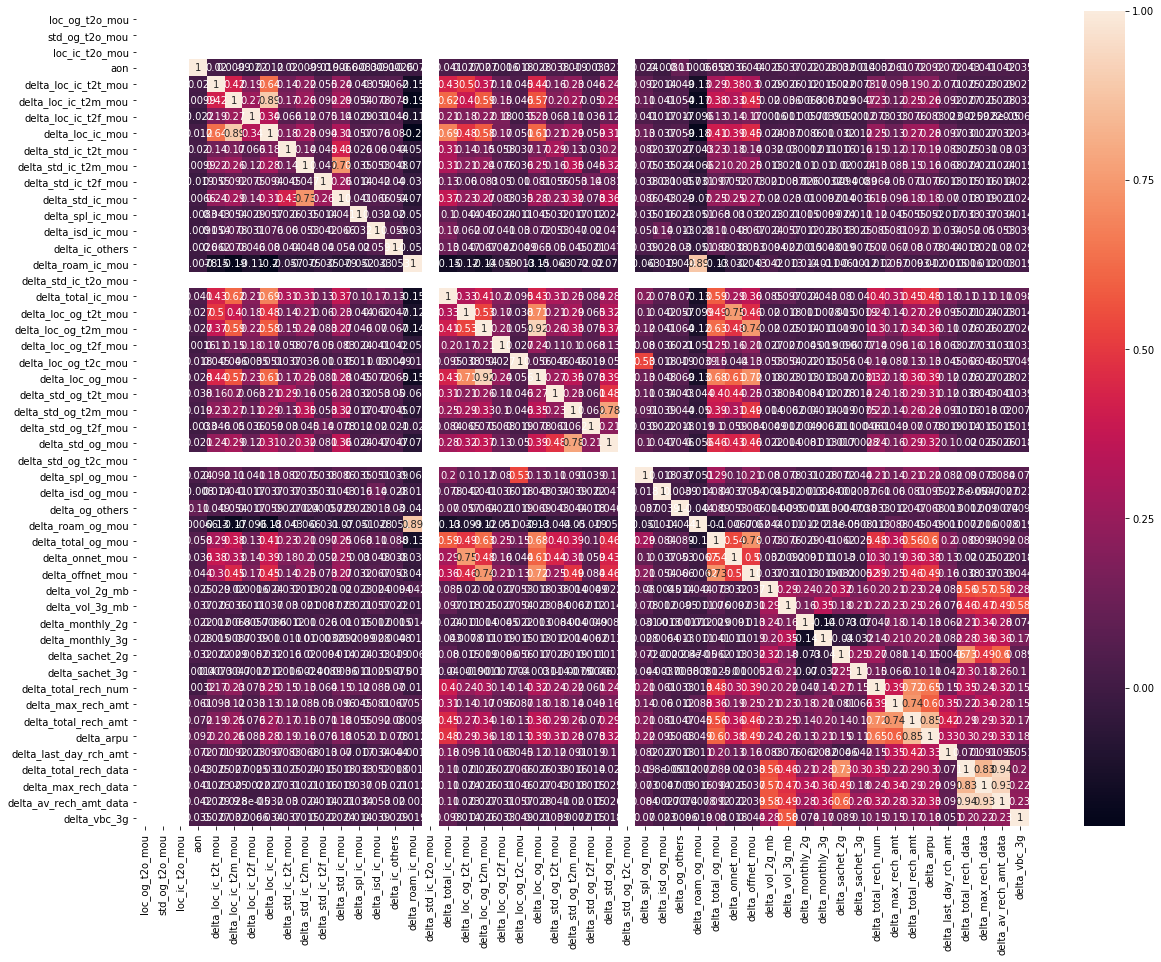

In [51]:
#plotting the heatmap for the correlation
plt.figure(figsize = (20,15)) 
sns.heatmap(X_train.corr(),annot = True)

### Applying PCA without sampling

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(random_state=42)

In [54]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

Components from PCA

In [55]:
pca.components_

array([[-5.14141532e-19,  1.11022302e-16, -0.00000000e+00, ...,
         4.05701686e-05,  4.21907925e-05,  3.21014074e-05],
       [ 6.25696953e-16,  2.09381124e-15,  0.00000000e+00, ...,
         8.15690811e-02,  8.82064504e-02,  4.38842550e-02],
       [-1.14735567e-16,  3.22441726e-16,  1.94289029e-16, ...,
         4.00157585e-01,  4.30636755e-01,  1.51150061e-01],
       ...,
       [-0.00000000e+00,  2.78413242e-04, -8.68991511e-04, ...,
        -2.07556953e-16,  1.98165052e-16, -8.07391805e-17],
       [ 9.99999988e-01, -1.57451093e-04,  4.77082221e-06, ...,
         7.85265611e-16, -1.27926878e-15,  2.17695938e-16],
       [ 0.00000000e+00, -3.02867481e-02, -9.99540560e-01, ...,
         1.18606513e-13,  6.63427646e-14, -1.26173377e-13]])

Explained variance ratio for each component

In [56]:
pca.explained_variance_ratio_

array([9.99956361e-01, 7.24332983e-06, 4.43849073e-06, 2.87743809e-06,
       2.36897607e-06, 2.21382270e-06, 1.75449011e-06, 1.66034764e-06,
       1.49529829e-06, 1.43923490e-06, 1.39309257e-06, 1.33325825e-06,
       1.27056662e-06, 1.13835778e-06, 1.10838311e-06, 9.50787991e-07,
       9.11583036e-07, 9.01931549e-07, 8.56139036e-07, 8.32004727e-07,
       7.84905802e-07, 7.63689119e-07, 6.99988848e-07, 5.95309192e-07,
       5.44465502e-07, 4.97269496e-07, 4.65384301e-07, 4.57511992e-07,
       4.05753971e-07, 2.78230478e-07, 2.69509299e-07, 2.53488390e-07,
       2.17967072e-07, 1.95783972e-07, 1.94442662e-07, 1.58314801e-07,
       1.41821801e-07, 1.33531045e-07, 9.19031912e-08, 8.54777243e-08,
       8.26518113e-08, 4.17883740e-08, 3.79707279e-08, 2.79675824e-08,
       2.67811850e-08, 1.97206712e-31, 9.98127514e-33, 9.98127514e-33,
       9.93224083e-33, 8.99248365e-33])

Making a plot for the explained variance

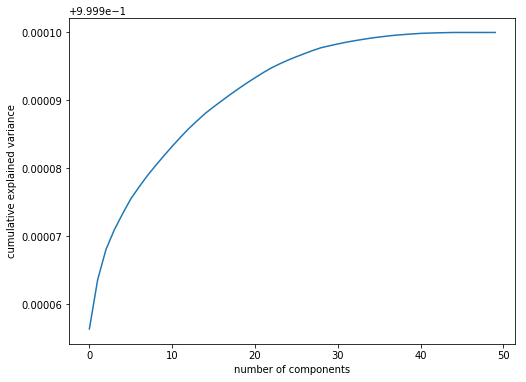

In [57]:
#plotting the number of components vs cumulative explained variance
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Perform PCA with 20 components

In [58]:
from sklearn.decomposition import IncrementalPCA

In [59]:
pca_final = IncrementalPCA(n_components=20)

In [60]:
df_train_pca = pca_final.fit_transform(X_train)

In [61]:
df_train_pca.shape

(20967, 20)

In [62]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 20)

### Applying logistic regression on the data on our Principal components

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
learner_pca = LogisticRegression()

In [65]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [66]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [67]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.87'

### Sampling for imbalanced data using SMOTE

In [68]:
#pip install -U imbalanced-learn

In [69]:
# importing the SMOTE package for working on class-imbalance
from imblearn.over_sampling import SMOTE
y = high_value_cust.pop('churn')
X = high_value_cust

Using TensorFlow backend.


In [70]:
#changing the imbalance
smote = SMOTE(sampling_strategy=0.8, random_state=42)

X_blncd, y = smote.fit_sample(X, y)

# Check the new ratio. 
X = pd.DataFrame(X_blncd , columns=X.columns)
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 27520]
 [    1 22016]]


In [71]:
# Let's Split data into test-train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
#perform standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
#importing PCA
from sklearn.decomposition import PCA

In [74]:
#setting random state to 42
pca = PCA(random_state=42)

In [75]:
#fiiting data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

Components from PCA

In [76]:
pca.components_

array([[ 1.76934674e-19, -1.11022302e-16,  0.00000000e+00, ...,
         1.02925548e-01,  1.06393411e-01,  6.39095541e-02],
       [ 1.52572250e-18, -0.00000000e+00, -1.11022302e-16, ...,
        -3.32954079e-01, -3.42764977e-01, -1.78471682e-01],
       [ 7.03937139e-19,  5.55111512e-17,  2.08166817e-17, ...,
         2.15981980e-01,  2.35190049e-01,  4.44223375e-02],
       ...,
       [-0.00000000e+00, -7.96560282e-03,  7.34667591e-01, ...,
         5.55111512e-17, -2.49800181e-16, -6.93889390e-17],
       [-0.00000000e+00,  4.08745965e-03, -3.46160947e-01, ...,
        -1.66533454e-16,  4.16333634e-16,  9.36750677e-17],
       [ 9.99999314e-01, -1.17169033e-03, -1.11446499e-05, ...,
         5.14996032e-19,  2.11419424e-18,  7.58941521e-19]])

Explained variance ratio for each component

In [77]:
pca.explained_variance_ratio_

array([2.36421349e-01, 1.20472612e-01, 5.50404889e-02, 3.95579702e-02,
       3.43720397e-02, 3.14548216e-02, 2.90488093e-02, 2.73878362e-02,
       2.55002927e-02, 2.48724152e-02, 2.39722634e-02, 2.27903750e-02,
       2.20340233e-02, 2.16303485e-02, 2.04985689e-02, 2.02572892e-02,
       1.99276616e-02, 1.88069103e-02, 1.81220113e-02, 1.76738969e-02,
       1.63825653e-02, 1.62031704e-02, 1.47875153e-02, 1.39616709e-02,
       1.37673490e-02, 1.18081677e-02, 1.15120924e-02, 9.58413333e-03,
       8.00533024e-03, 7.58374782e-03, 7.36642370e-03, 6.43697574e-03,
       5.34832904e-03, 4.52624379e-03, 3.62498623e-03, 3.55238158e-03,
       2.98007819e-03, 2.82648160e-03, 2.68268779e-03, 2.18743925e-03,
       1.72889649e-03, 1.31462017e-03, 9.26602193e-04, 5.78858378e-04,
       4.81270841e-04, 4.66284581e-32, 1.13670622e-33, 1.13670622e-33,
       1.13670622e-33, 1.13397556e-33])

Making a scree plot for the explained variance

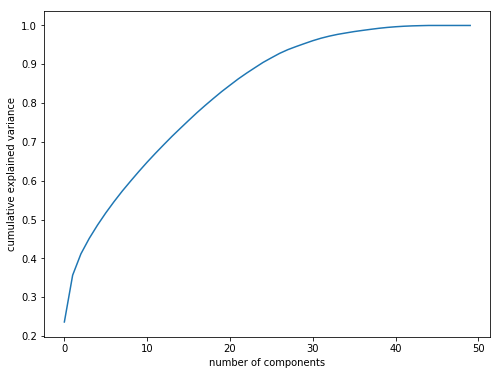

In [78]:
#plotting the number of components vs cumulative explained variance
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Perform PCA with 20 components

In [79]:
from sklearn.decomposition import IncrementalPCA

In [80]:
pca_final = IncrementalPCA(n_components=20)

In [81]:
df_train_pca = pca_final.fit_transform(X_train)

In [82]:
df_train_pca.shape

(34675, 20)

In [83]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(14861, 20)

### Step 3 :Model Building & Evaluation

### Applying logistic regression on the Principal components

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
learner_pca = LogisticRegression()

In [86]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [87]:
#renaming the columns
cols=['a', 'b', 'c', 'd', 'e', 'f',
         'g', 'h', 'i', 'j', 'k', 'l',
         'm', 'n', 'o', 'p', 'q', 'r',
         's', 't']
df_train_pca = pd.DataFrame(df_train_pca, columns=cols)
df_test_pca = pd.DataFrame(df_test_pca, columns=cols)

In [88]:
#adding the constant and performing the logistic regression
X_train_sm = sm.add_constant(df_train_pca)
X_train_sm.shape

(34675, 21)

In [89]:
y_train.index=X_train_sm.index
y_train.index

RangeIndex(start=0, stop=34675, step=1)

In [90]:
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                34675
Model:                            GLM   Df Residuals:                    34654
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13761.
Date:                Mon, 27 Jan 2020   Deviance:                       27522.
Time:                        20:16:33   Pearson chi2:                 4.41e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3702      0.016    -23.790      0.000      -0.401      -0.340
a             -0.5528      0.006    -90.365      0.0

In [91]:
#performing VIF inorder to find the correlation between the variables
vif = pd.DataFrame()
vif['Features'] = df_train_pca.columns
vif['VIF'] = [variance_inflation_factor(df_train_pca.values, i) for i in range(df_train_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

   Features  VIF
0         a  1.0
1         b  1.0
18        s  1.0
17        r  1.0
16        q  1.0
15        p  1.0
14        o  1.0
13        n  1.0
12        m  1.0
11        l  1.0
10        k  1.0
9         j  1.0
8         i  1.0
7         h  1.0
6         g  1.0
5         f  1.0
4         e  1.0
3         d  1.0
2         c  1.0
19        t  1.0


In [92]:
#dropping the variable h
df_train_pca = df_train_pca.drop(['m'], axis = 1)
df_test_pca = df_test_pca.drop(['m'], axis = 1)

In [93]:
#Again building the model and checking the p value
X_train_sm = sm.add_constant(df_train_pca)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                34675
Model:                            GLM   Df Residuals:                    34655
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13762.
Date:                Mon, 27 Jan 2020   Deviance:                       27524.
Time:                        20:16:35   Pearson chi2:                 4.42e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3705      0.016    -23.813      0.000      -0.401      -0.340
a             -0.5530      0.006    -90.408      0.0

In [94]:
#performing VIF inorder to find the correlation between the variables
vif = pd.DataFrame()
vif['Features'] = df_train_pca.columns
vif['VIF'] = [variance_inflation_factor(df_train_pca.values, i) for i in range(df_train_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

   Features  VIF
0         a  1.0
10        k  1.0
17        s  1.0
16        r  1.0
15        q  1.0
14        p  1.0
13        o  1.0
12        n  1.0
11        l  1.0
9         j  1.0
1         b  1.0
8         i  1.0
7         h  1.0
6         g  1.0
5         f  1.0
4         e  1.0
3         d  1.0
2         c  1.0
18        t  1.0


In [95]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [96]:
#getting the predicted score
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,1,0.959619
1,1,0.744808
2,0,0.055236
3,0,0.108569
4,0,0.003268


In [97]:
#putting the cutoff as 0.5 as of now and predicting the result
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.959619,1
1,1,0.744808,1
2,0,0.055236,0
3,0,0.108569,0
4,0,0.003268,0


In [98]:
#creating the confusion matrix and printing it
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16977  2326]
 [ 3229 12143]]


In [99]:
#creating the methods to find the sensitivity and Accuracy
def calcSensi(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print(TP / float(TP+FN))
    
def calcAccuracy(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print((TP + TN) / float(TP + TN + FP + FN))

In [100]:
#calculating the Sensitivity
calcSensi(confusion)

0.7899427530575072


In [101]:
#calculating the Accuracy
calcAccuracy(confusion)

0.8397981254506128


In [102]:
#Creating a method to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

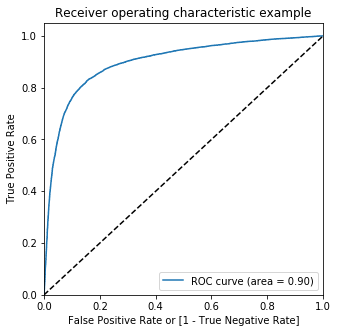

In [104]:
#Plotting the ROC Curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [105]:
# Let's create columns with different probability cutoffs using a for loop
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.959619,1,1,1,1,1,1,1,1,1,1,1
1,1,0.744808,1,1,1,1,1,1,1,1,1,0,0
2,0,0.055236,0,1,0,0,0,0,0,0,0,0,0
3,0,0.108569,0,1,1,0,0,0,0,0,0,0,0
4,0,0.003268,0,1,0,0,0,0,0,0,0,0,0


In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.443317  1.000000  0.000000
0.1   0.1  0.640144  0.964416  0.381910
0.2   0.2  0.757260  0.921416  0.626535
0.3   0.3  0.812660  0.882188  0.757292
0.4   0.4  0.834290  0.836261  0.832720
0.5   0.5  0.839798  0.789943  0.879501
0.6   0.6  0.834290  0.736469  0.912190
0.7   0.7  0.816035  0.664130  0.937005
0.8   0.8  0.783129  0.564663  0.957105
0.9   0.9  0.713425  0.378415  0.980210


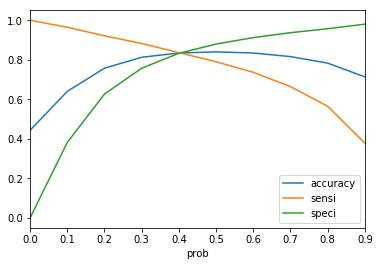

In [107]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above output we can see that 0.4 looks better

In [108]:
df_test_pca.shape

(14861, 19)

In [109]:
#storing the final columns names used in the train dataset in a variable called cols1
cols1=['a', 'b', 'c', 'd', 'e', 'f',
         'g', 'h','i', 'j', 'k', 'l',
          'n', 'o', 'p','q','r','s','t']

In [110]:
df_train_pca.shape

(34675, 19)

In [111]:
#df_test_pca=df_test_pca[cols1]

In [112]:
df_test_pca.shape

(14861, 19)

In [113]:
#adding the constant
X_test_sm = sm.add_constant(df_test_pca)

In [114]:
#putting the model on the test dataset
y_test_pred = res.predict(X_test_sm)

In [115]:
#Predicting and checking the predicted values
y_test_pred = pd.DataFrame(y_test_pred)
#y_test_pred.reset_index(drop=True, inplace=True)
y_test_pred = y_test_pred.rename(columns={ 0 : 'Churn_Prob'})
y_test_pred.head()

,Churn_Prob
0,0.098252
1,0.002732
2,0.892302
3,0.916772
4,0.096241


In [116]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)
y_test= y_test.rename(columns={ 0 : 'Churn'})
y_test.head()

,churn
0,0
1,0
2,1
3,1
4,0


In [117]:
#concating the Y test and y test predicted values
y_pred_final = pd.concat([y_test, y_test_pred],axis=1)
y_pred_final.head()

,churn,Churn_Prob
0,0,0.098252
1,0,0.002732
2,1,0.892302
3,1,0.916772
4,0,0.096241


In [118]:
#taking 0.4 as the cuttoff and putting the values
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [119]:
##checking the accracy score wrt train and test dataset
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8340623107462486

In [120]:
#getting the confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion

array([[6835, 1382],
       [1084, 5560]], dtype=int64)

In [121]:
#Calculating the sensitivity
calcSensi(confusion)

0.8368452739313667


### Applying SVM on PCA components to build the model

In [122]:
#importing the SVM algorithm required libraries and building the model
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(df_train_pca, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
#Predicting the y value using the SVM algorithm
y_test_pred = svm.predict(df_test_pca)

In [124]:
#creating a confusion matrix wrt SVM algorithm
confusion = metrics.confusion_matrix(y_test, y_test_pred )
confusion

array([[7765,  452],
       [ 131, 6513]], dtype=int64)

In [125]:
#creating the methods to find the sensitivity and Accuracy
def calcSensi(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print(TP / float(TP+FN))
    
def calcAccuracy(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print((TP + TN) / float(TP + TN + FP + FN))

In [126]:
#calculating the Accuracy of the model
calcAccuracy(confusion)

0.9607698001480385


In [127]:
#Calculating the Sensitvity of the model
calcSensi(confusion)

0.9802829620710415


## Building Decision Tree Model by tuning Hyperparameters

In [128]:
#importing the decsion tree libraries to build one
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [129]:
#taking the value of the number of folds as 5 and training the model
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 20)}
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)

tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
 

In [130]:
#mean train score
tree.cv_results_['mean_train_score']

array([0.80787311, 0.8151478 , 0.83517664, 0.85450613, 0.87062725,
       0.88465032, 0.89857246, 0.91237924, 0.92437635, 0.9375703 ,
       0.94891853, 0.95883201, 0.96723864, 0.97394376, 0.97896179,
       0.98252343, 0.98562365, 0.98824802, 0.99036049])

In [131]:
#visualizing the dataset
scores = tree.cv_results_
Scores=pd.DataFrame(scores)
Scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.108317,0.001333,0.002590,0.000489,1,{'max_depth': 1},0.811391,0.800865,0.812112,0.806633,0.802596,0.806720,0.004521,19,0.806633,0.809409,0.806417,0.807931,0.808976,0.807873,0.001203
1,0.191084,0.002332,0.002588,0.000504,2,{'max_depth': 2},0.814852,0.816294,0.816727,0.814564,0.809229,0.814333,0.002682,18,0.816943,0.813735,0.815826,0.813843,0.815393,0.815148,0.001220
2,0.267503,0.000394,0.002386,0.000481,3,{'max_depth': 3},0.835328,0.825234,0.835761,0.833165,0.828551,0.831608,0.004086,17,0.835652,0.836986,0.835220,0.832877,0.835148,0.835177,0.001326
3,0.344081,0.001100,0.002592,0.000488,4,{'max_depth': 4},0.849459,0.847441,0.855660,0.852920,0.845278,0.850151,0.003731,16,0.846828,0.856525,0.856669,0.857895,0.854614,0.854506,0.003980
4,0.416899,0.001266,0.002388,0.000486,5,{'max_depth': 5},0.864600,0.866042,0.867484,0.861283,0.858688,0.863619,0.003211,15,0.868962,0.871593,0.872134,0.870944,0.869503,0.870627,0.001212


In [132]:
Scores.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'], dtype='object')

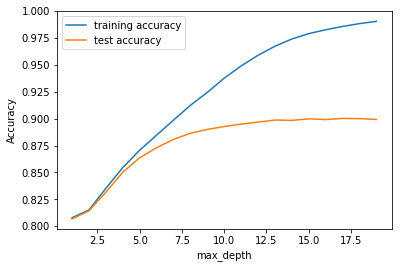

In [133]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [134]:
dtree = DecisionTreeClassifier(criterion = "gini", max_depth=3)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [135]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [136]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.110635,0.023230,0.002974,0.000036,5,{'min_samples_leaf': 5},0.899640,0.898198,0.899640,0.901081,0.891709,0.898053,0.003301,1,0.963410,0.962978,0.962761,0.961788,0.963663,0.962920,0.000648
1,0.932736,0.009156,0.002978,0.000040,25,{'min_samples_leaf': 25},0.892430,0.884211,0.890267,0.888825,0.883201,0.887787,0.003538,2,0.917412,0.916583,0.916258,0.918241,0.917520,0.917203,0.000707
2,0.868890,0.018820,0.002993,0.000040,45,{'min_samples_leaf': 45},0.895746,0.879164,0.886518,0.887815,0.882769,0.886402,0.005566,3,0.905984,0.902596,0.901154,0.904362,0.904326,0.903684,0.001658
3,0.826589,0.027287,0.002626,0.000486,65,{'min_samples_leaf': 65},0.889690,0.879452,0.888536,0.882624,0.875415,0.883143,0.005396,4,0.895674,0.894521,0.894917,0.898991,0.895710,0.895963,0.001580
4,0.779138,0.008629,0.002993,0.000047,85,{'min_samples_leaf': 85},0.888969,0.879452,0.884355,0.877289,0.871233,0.880260,0.006059,5,0.890699,0.889690,0.887455,0.893619,0.889293,0.890151,0.002027


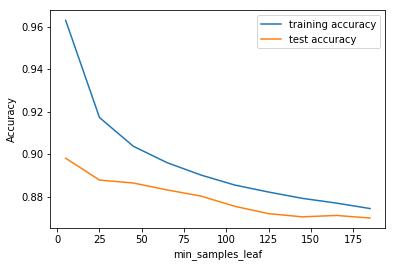

In [137]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [138]:
# tree with max_depth = 3
tree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [139]:
#importing the libraries for classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8217
           1       0.88      0.87      0.87      6644

    accuracy                           0.89     14861
   macro avg       0.89      0.89      0.89     14861
weighted avg       0.89      0.89      0.89     14861



In [140]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7460  757]
 [ 891 5753]]


In [141]:
#Calculating the sensitivity
calcSensi(confusion_matrix(y_test,y_pred))

0.8658940397350994


In [142]:
#Calculating the Accuracy
calcAccuracy(confusion_matrix(y_test,y_pred))

0.8891057129399098


### Building model using Random forest classifier by tuning the Hyperparameters

In [143]:
# Let's Split data into test-train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [144]:
from sklearn.ensemble import RandomForestClassifier

# number of CV folds
n_folds = 5

# parameters to build the model on
# max_depth - [0-100]
# n_extimators - 20
parameters = {'max_depth': range(1, 15)}
dtree = RandomForestClassifier(criterion = "gini",
                               n_estimators= 20,
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False, random_state=100,
                                  

In [145]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.232777,0.002054,0.012168,0.000399,1,{'max_depth': 1},0.809373,0.804614,0.808219,0.802884,0.799423,0.804903,0.003610,14,0.804506,0.806381,0.804434,0.806309,0.806561,0.805638,0.000957
1,0.382975,0.004039,0.013173,0.000395,2,{'max_depth': 2},0.826965,0.821774,0.824513,0.822206,0.814420,0.821975,0.004208,13,0.822567,0.824117,0.821882,0.822386,0.820692,0.822329,0.001108
2,0.523412,0.001739,0.013349,0.000806,3,{'max_depth': 3},0.839077,0.837058,0.841961,0.839510,0.836337,0.838789,0.001983,12,0.839257,0.841637,0.840267,0.840735,0.843583,0.841096,0.001461
3,0.671036,0.002021,0.014344,0.000468,4,{'max_depth': 4},0.847585,0.844989,0.851911,0.845566,0.840663,0.846143,0.003662,11,0.846215,0.849387,0.849712,0.848919,0.849820,0.848810,0.001335
4,0.795472,0.003489,0.015565,0.000481,5,{'max_depth': 5},0.862870,0.859120,0.869358,0.861572,0.855660,0.861716,0.004543,10,0.864131,0.868169,0.868457,0.866474,0.866006,0.866647,0.001572


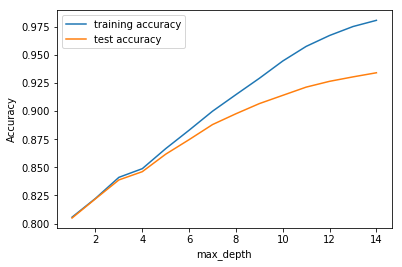

In [146]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [147]:
from sklearn.ensemble import RandomForestClassifier

# number of CV folds
n_folds = 5

# parameters to build the model on
# min_sample_leaf - [5-200]
# n_extimators - 20
parameters = {'min_samples_leaf': range(5, 200, 20)}

dtree = RandomForestClassifier(criterion = "gini",
                               n_estimators= 20,
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False, random_state=100,
                                  

In [148]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.957151,0.058858,0.027535,0.000496,5,{'min_samples_leaf': 5},0.929056,0.932084,0.933814,0.928479,0.928335,0.930353,0.002202,1,0.973396,0.975198,0.974081,0.971629,0.973216,0.973504,0.001167
1,1.637392,0.027100,0.024336,0.000488,25,{'min_samples_leaf': 25},0.910454,0.908580,0.906128,0.906561,0.903821,0.907109,0.002255,2,0.926929,0.922999,0.925487,0.926893,0.926136,0.925689,0.001446
2,1.543872,0.017018,0.023341,0.001204,45,{'min_samples_leaf': 45},0.896756,0.901658,0.902668,0.896323,0.893295,0.898140,0.003509,3,0.904434,0.909265,0.910418,0.912040,0.911608,0.909553,0.002737
3,1.413618,0.016451,0.021932,0.000631,65,{'min_samples_leaf': 65},0.888104,0.890123,0.892141,0.888392,0.886229,0.888998,0.001999,4,0.894484,0.896720,0.901154,0.899856,0.900433,0.898529,0.002526
4,1.346631,0.021468,0.021520,0.000808,85,{'min_samples_leaf': 85},0.885220,0.884066,0.891853,0.884066,0.877578,0.884557,0.004536,5,0.892286,0.889113,0.894917,0.891889,0.895025,0.892646,0.002191


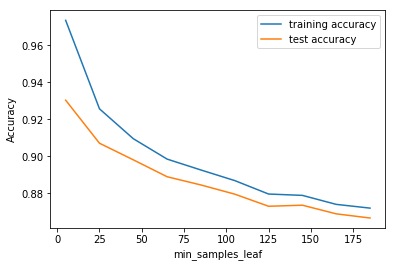

In [149]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [150]:
#Fitting the model  
rfc = RandomForestClassifier(criterion = "gini",
                               n_estimators= 200,
                               max_depth=12,
                               min_samples_leaf=5,
                               min_samples_split=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
#Imporing the confussion Matrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8217
           1       0.93      0.90      0.92      6644

    accuracy                           0.93     14861
   macro avg       0.93      0.92      0.92     14861
weighted avg       0.93      0.93      0.93     14861



In [152]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7753  464]
 [ 644 6000]]


In [153]:
#Calculating the Sensitivity of the Random Forest model
calcSensi(confusion_matrix(y_test,y_pred))

0.9030704394942806


In [154]:
#Calculating the Accuracy of the Random Forest model
calcAccuracy(confusion_matrix(y_test,y_pred))

0.925442433214454


#### Summary of the important predictor attributes with their importance (using Random Forest)

In [155]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['Variables']), pd.DataFrame(rfc.feature_importances_, columns = ['Importance'])), axis =1).sort_values(by ='Importance', ascending = False)

,Variables,Importance
44,delta_arpu,0.141483
17,delta_total_ic_mou,0.121387
43,delta_total_rech_amt,0.095615
32,delta_total_og_mou,0.066543
42,delta_max_rech_amt,0.066100
41,delta_total_rech_num,0.050635
15,delta_roam_ic_mou,0.050034
31,delta_roam_og_mou,0.049272
45,delta_last_day_rch_amt,0.035915
23,delta_std_og_t2t_mou,0.023070


### Important Predictor variables are 
arpu<br>
total_rech_amt<br>
total_ic_mou<br>
total_og_mou<br>
max_rech_amt<br>
roam_og_mou<br>
roam_ic_mou<br>
last_day_rch_amt<br>

Model Chosen is :
Random forest - gives the best model with 90% Recall/Sensitivity compared to Decision tree and logistic regression models.

#### Recommendations<br>
User might have been travelling most of the times,<br>
because of which the user might look for feasible outgoing and incoming charges on roaming<br>
#### So the charges on roaming must be reduced.<br>
If there is no recharge done then the user might have moved to new location.
#### So if any easy way to change the default location in the app so that customer wont stop using the same simcard
More number of recharge offers or cashback offers can be provided to increase the average revenue per user.
